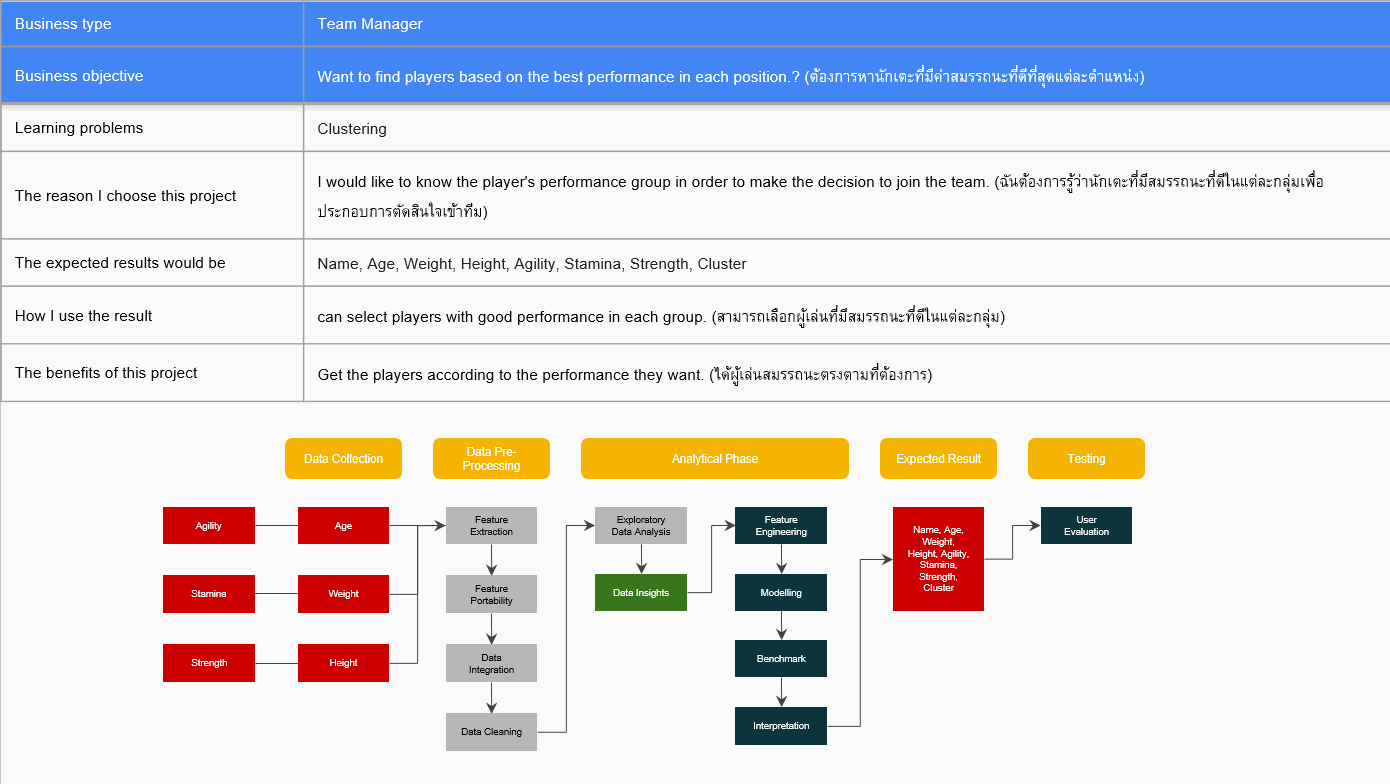

# Import Library

In [1]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 2.7 MB/s 
     |████████████████████████████████| 1.1 MB 12.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=2d01115a5b014967dc8d13e94f48cf01eec23628cbe38db2f5b654fa7de732ae
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=3d109b3b6276f01261342f71548e94b912162ef9c375290f26e6af2b759cfe14
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from umap import UMAP
import plotly.express as px
from sklearn.preprocessing import StandardScaler

# Import Data Fifa 19

In [3]:
fifa = pd.read_csv('https://raw.githubusercontent.com/boatmessi02/Fifa19/main/data.csv')
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Check

In [4]:
# ดูสรุปชุดข้อมูล
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
# ดูสรุปสถิติของตัวแปรตัวเลข
fifa.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [6]:
# ดูหน่วย น้ำหนัก, ส่วนสูง
cfifa = fifa[["Height","Weight"]]
cfifa.head(5)

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
3,6'4,168lbs
4,5'11,154lbs


In [7]:
# เช็คว่ามีค่า Null ในคอลัมน์ไหม
fifa.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [8]:
# เช็คว่ามีค่า Null ไหมใน คอลัมน์ที่จะใช้
fifa[['Name','Age','Height', 'Weight','Position','Agility','Stamina','Strength']].isnull().sum()

Name         0
Age          0
Height      48
Weight      48
Position    60
Agility     48
Stamina     48
Strength    48
dtype: int64

In [9]:
# เช็ค null เปอร์เซ็นต์ในคอลัมน์
(fifa[['Name','Age','Height', 'Weight','Position','Agility','Stamina','Strength']].isna().sum()/fifa.shape[0]).round(5)

Name        0.00000
Age         0.00000
Height      0.00264
Weight      0.00264
Position    0.00330
Agility     0.00264
Stamina     0.00264
Strength    0.00264
dtype: float64

In [10]:
# เช็คจำนวนคอลัมน์ และจำนวนแถว
new_fifa = fifa[['Name','Age','Weight','Height','Position','Agility','Stamina','Strength']]
new_fifa.shape

(18207, 8)

In [11]:
# สร้างตัวแปรใหม่มาเก็บข้อมูล ของ new_fifa และทำการ drop row ที่มีค่า null
sec_fifa = new_fifa.dropna().copy()

In [12]:
# เช็คว่ามีค่า Null เหลืออยู่ไหม
sec_fifa.isnull().sum()

Name        0
Age         0
Weight      0
Height      0
Position    0
Agility     0
Stamina     0
Strength    0
dtype: int64

In [13]:
# ดูว่าเหลือเท่าไหร่
sec_fifa.shape

(18147, 8)

In [14]:
# reset index ให้ตรงกับ dataframe
sec_fifa.reset_index(drop=True,inplace=True)

# Data-Prepocessing

เปลี่ยนชื่อ คอลัมน์ Weight => Weight_kg

In [15]:
# เปลี่ยนชื่อ คอลัมน์ Weight => Weight_kg
sec_fifa.rename(columns= { 'Weight': 'Weight_kg'}, inplace=True )

# เปลี่ยนชื่อ คอลัมน์ Height => Height_cm
sec_fifa.rename(columns= { 'Height': 'Height_cm'}, inplace=True )

In [16]:
sec_fifa['Height_cm'].head(5)

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height_cm, dtype: object

แปลงส่วนสูงจาก ฟุต, นิ้ว เป็น เซ็นติเมตร

In [17]:
# แปลงส่วนสูงจาก ฟุต, นิ้ว เป็น เซ็นติเมตร
sec_fifa['Height_cm'] = sec_fifa['Height_cm'].apply(lambda i: int(i.split("'")[0])*12*2.54 + 2.54*int(i.split("'")[1]))

In [18]:
sec_fifa['Height_cm'].head(5)

0    170.18
1    187.96
2    175.26
3    193.04
4    180.34
Name: Height_cm, dtype: float64

ลบตัวอักษร lbs

In [19]:
# ลบ string lbs
sec_fifa['Weight_kg'] = sec_fifa['Weight_kg'].str.replace(r'\D', '')
sec_fifa['Weight_kg'].head(5)

0    159
1    183
2    150
3    168
4    154
Name: Weight_kg, dtype: object

เปลี่ยนส่วนสูง และน้ำหนักให้เป็น int

In [20]:
# เปลี่ยนประเภทของน้ำหนักจาก object ให้เป็น int
sec_fifa['Weight_kg'] = sec_fifa['Weight_kg'].astype(int)

sec_fifa[['Weight_kg','Height_cm']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Weight_kg  18147 non-null  int64  
 1   Height_cm  18147 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 283.7 KB


แปลงน้ำหนักจาก ปอนด์ เป็น กิโลกรัม

In [21]:
# แปลงน้ำหนักจาก ปอนด์ เป็น กิโลกรัม 
lbs_to_kg = 0.45359237
sec_fifa['Weight_kg'] *= lbs_to_kg

sec_fifa[['Weight_kg','Height_cm']].head(5)

,Weight_kg,Height_cm
0,72.121187,170.18
1,83.007404,187.96
2,68.038855,175.26
3,76.203518,193.04
4,69.853225,180.34


หาค่า BMI

In [22]:
# หาค่า BMI => น้ำหนัก(KG) / ((ส่วนสูง(CM)/100)**2)
sec_fifa['BMI'] = sec_fifa['Weight_kg']/((sec_fifa['Height_cm']/100)**2)
sec_fifa[['Name', 'Age', 'Height_cm', 'Weight_kg', 'BMI']].head(5)

,Name,Age,Height_cm,Weight_kg,BMI
0,L. Messi,31,170.18,72.121187,24.902665
1,Cristiano Ronaldo,33,187.96,83.007404,23.495568
2,Neymar Jr,26,175.26,68.038855,22.150900
3,De Gea,27,193.04,76.203518,20.449392
4,K. De Bruyne,27,180.34,69.853225,21.478420


แปลงค่า Weight และ BMI ทศนิยมให้เหลือ 2 ตำแหน่ง

In [23]:
# แปลงค่า Weight และ BMI ทศนิยมให้เหลือ 2 ตำแหน่ง
sec_fifa['Weight_kg'] = sec_fifa['Weight_kg'].round(2)
sec_fifa['BMI'] = sec_fifa['BMI'].round(2)

In [24]:
# GK  => GK
# DEF => LWB LB LCB CB RCB RB RWB
# MID => LDM CDM RDM LCM CM RCM LM RM LAM CAM RAM
# ATK => LW RW LF CF RF LS ST RS

cond_pos = [
              (sec_fifa['Position'] == 'GK'),
              (sec_fifa['Position'] == 'LWB') | (sec_fifa['Position'] == 'LB') | (sec_fifa['Position'] == 'LCB') | (sec_fifa['Position'] == 'CB') | (sec_fifa['Position'] == 'RCB') | (sec_fifa['Position'] == 'RB') | (sec_fifa['Position'] == 'RWB'),
              (sec_fifa['Position'] == 'LDM') | (sec_fifa['Position'] == 'CDM') | (sec_fifa['Position'] == 'RDM') | (sec_fifa['Position'] == 'LCM') | (sec_fifa['Position'] == 'CM') | (sec_fifa['Position'] == 'RCM') | (sec_fifa['Position'] == 'LM') | (sec_fifa['Position'] == 'RM') | (sec_fifa['Position'] == 'LAM') | (sec_fifa['Position'] == 'CAM') | (sec_fifa['Position'] == 'RAM'),
              (sec_fifa['Position'] == 'LW') | (sec_fifa['Position'] == 'RW') | (sec_fifa['Position'] == 'LF') | (sec_fifa['Position'] == 'CF') | (sec_fifa['Position'] == 'RF') | (sec_fifa['Position'] == 'LS') | (sec_fifa['Position'] == 'ST') | (sec_fifa['Position'] == 'RS')
]

group_pos = ['GK', 'DEF', 'MID', 'ATK']

sec_fifa['Groups_Position'] = np.select(cond_pos, group_pos)

In [25]:
#เก็บข้อมูลดาต้าที่ยังไม่ Scale ไปโชว์หน้าผลลัพธ์
NamePlayer = sec_fifa.copy()

In [26]:
sec_fifa.head(30)

,Name,Age,Weight_kg,Height_cm,Position,Agility,Stamina,Strength,BMI,Groups_Position
0,L. Messi,31,72.12,170.18,RF,91.0,72.0,59.0,24.90,ATK
1,Cristiano Ronaldo,33,83.01,187.96,ST,87.0,88.0,79.0,23.50,ATK
2,Neymar Jr,26,68.04,175.26,LW,96.0,81.0,49.0,22.15,ATK
3,De Gea,27,76.20,193.04,GK,60.0,43.0,64.0,20.45,GK
4,K. De Bruyne,27,69.85,180.34,RCM,79.0,90.0,75.0,21.48,MID
5,E. Hazard,27,73.94,172.72,LF,95.0,83.0,66.0,24.78,ATK
6,L. Modrić,32,66.22,172.72,RCM,93.0,89.0,58.0,22.20,MID
7,L. Suárez,31,86.18,182.88,RS,82.0,90.0,83.0,25.77,ATK
8,Sergio Ramos,32,82.10,182.88,RCB,78.0,84.0,83.0,24.55,DEF
9,J. Oblak,25,87.09,187.96,GK,67.0,41.0,78.0,24.65,GK


#EDA


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



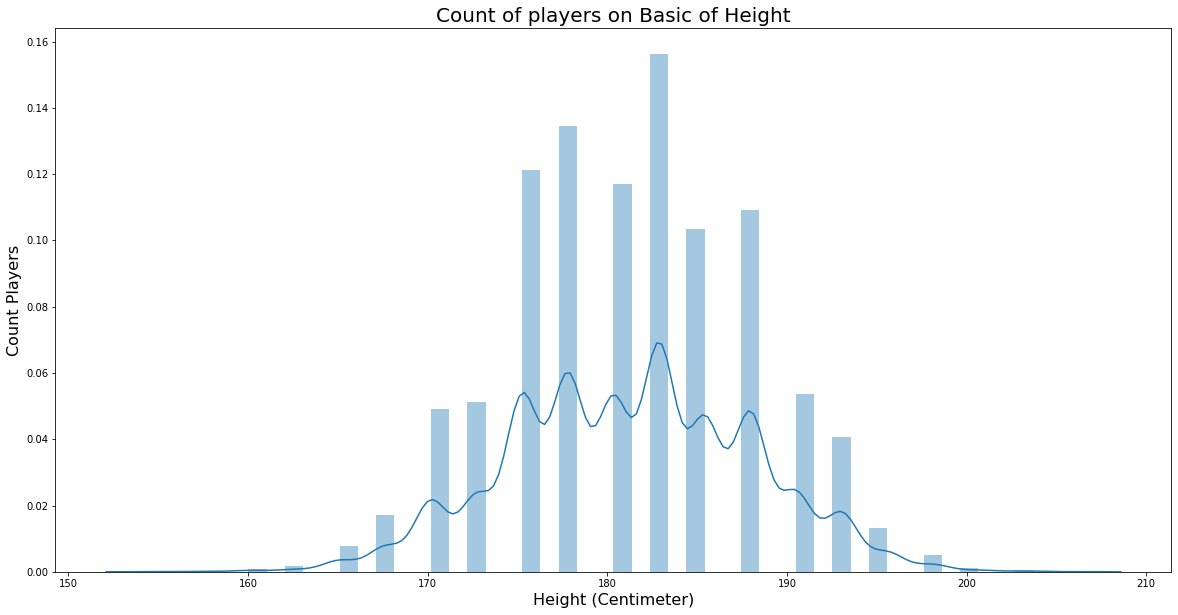

In [27]:
#เพื่อดูส่วนสูงที่มีกลุ่มเยอะที่สุด
plt.figure(figsize=(20, 10))
ax = sns.distplot(sec_fifa['Height_cm']);
ax.set_title(label = 'Count of players on Basic of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height (Centimeter)', fontsize = 16)
ax.set_ylabel(ylabel = 'Count Players', fontsize = 16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Count')

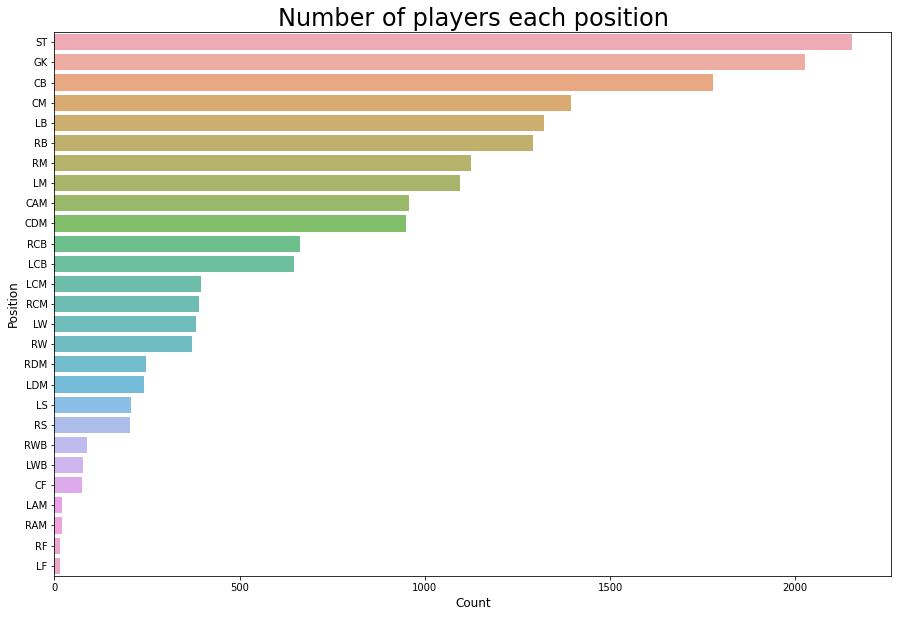

In [28]:
# เพื่อดูจำนวนตำแหน่งที่เยอะที่สุด
new_fifa.sort_values('Position', ascending=False)
Pos = sec_fifa['Position'].value_counts()[:30]
plt.figure(figsize=(15,10))
sns.barplot(Pos.values,Pos.index,  alpha=0.8)
plt.title('Number of players each position',fontsize=24)
plt.ylabel('Position', fontsize=12)
plt.xlabel('Count', fontsize=12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



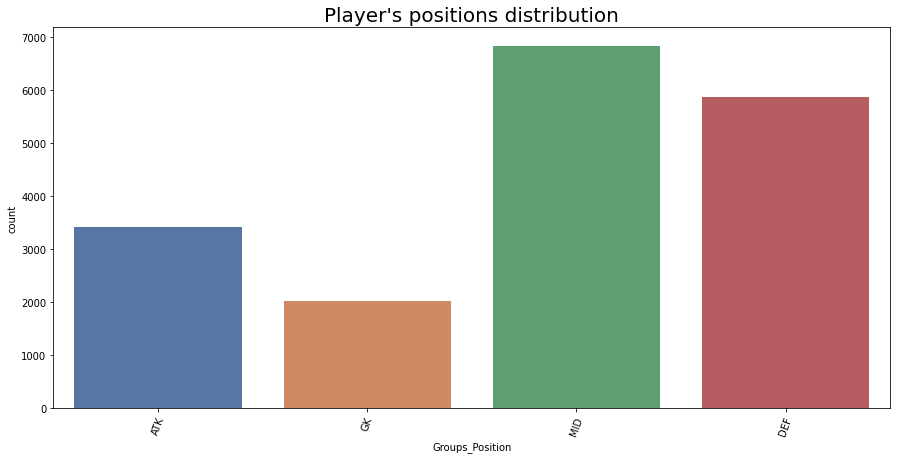

In [29]:
#เพื่อดูการจัดตำแหน่งที่เยอะที่สุด
plt.rcParams['figure.figsize'] = (15, 7)

sns.countplot(sec_fifa['Groups_Position'],palette="deep")
plt.title("Player's positions distribution", fontsize = 20)
plt.tick_params(axis='x', rotation=70)
plt.show()

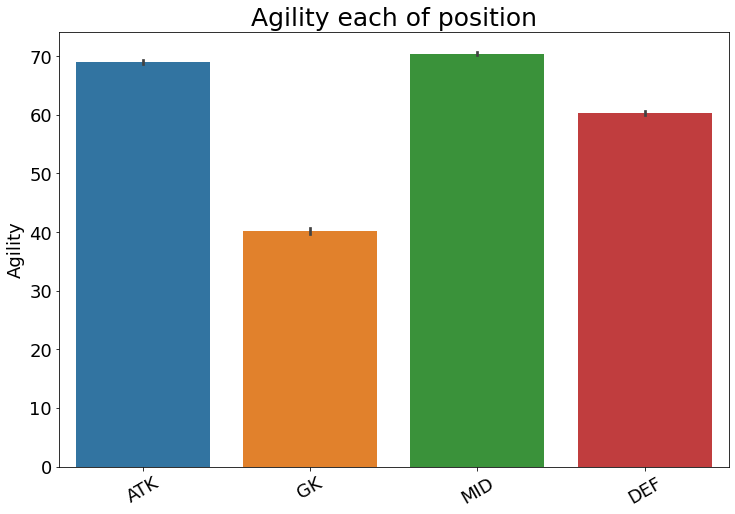

In [30]:
#เพื่อดูกลุ่มตำแหน่งที่มีความว่องไว
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=sec_fifa,x='Groups_Position', y='Agility')
plt.title('Agility each of position', fontsize=25)
plt.xlabel(None)
plt.xticks(fontsize=18, rotation=30)
plt.ylabel('Agility', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

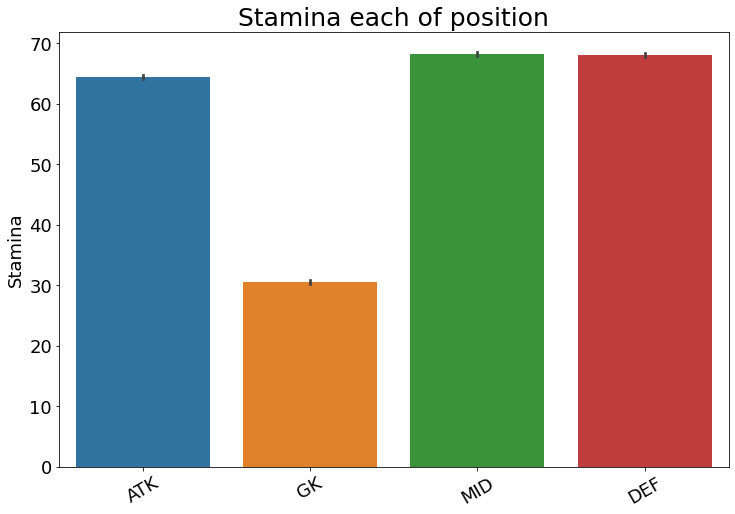

In [31]:
#เพื่อดูกลุ่มตำแหน่งที่มีความอึด
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=sec_fifa,x='Groups_Position', y='Stamina')
plt.title('Stamina each of position', fontsize=25)
plt.xlabel(None)
plt.xticks(fontsize=18, rotation=30)
plt.ylabel('Stamina', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

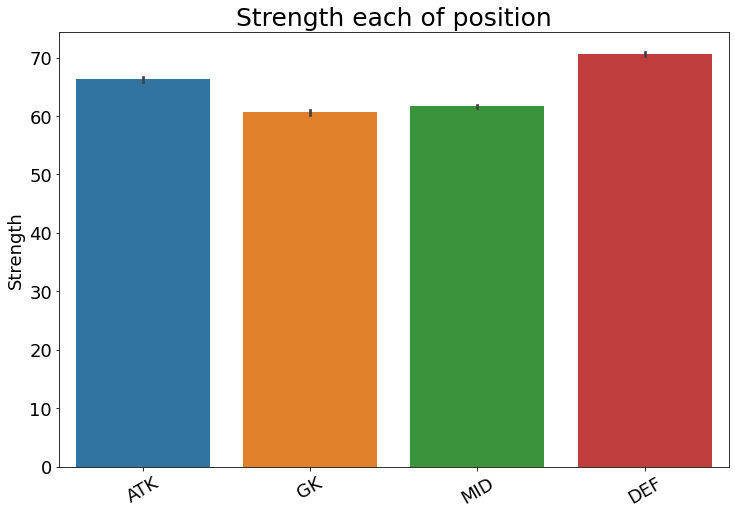

In [32]:
#เพื่อดูกลุ่มตำแหน่งที่มีความแข็งแกร่ง
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=sec_fifa,x='Groups_Position', y='Strength')
plt.title('Strength each of position', fontsize=25)
plt.xlabel(None)
plt.xticks(fontsize=18, rotation=30)
plt.ylabel('Strength', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Text(0, 0.5, 'Stamina each player')

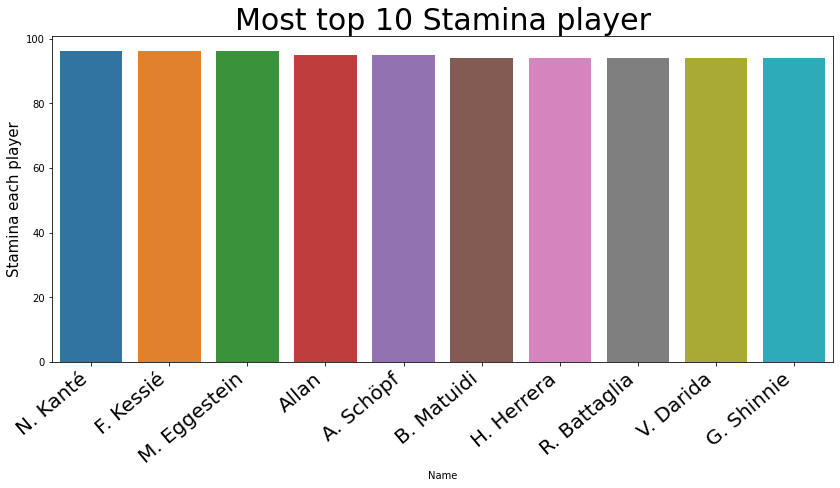

In [33]:
#เพื่อดูนักเตะที่มีความอึดมากที่สุด 10 คน
plt.figure(figsize=(14,6))
ax = sns.barplot(data=sec_fifa.nlargest(10,'Stamina', keep='first'), x='Name', y='Stamina')
ax.set_title('Most top 10 Stamina player', fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=40, ha="right")
ax.set_ylabel('Stamina each player', fontsize=15)

Text(0, 0.5, 'Agility each player')

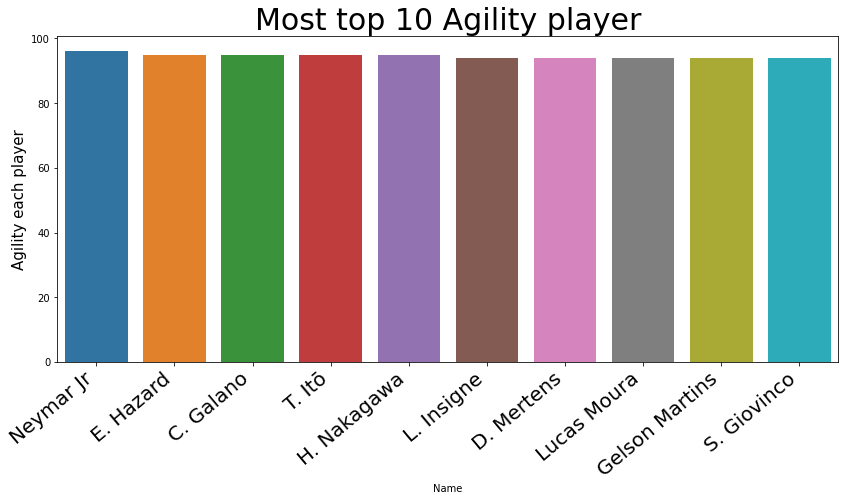

In [34]:
#เพื่อดูนักเตะที่มีความว่องไวมากที่สุด 10 คน

plt.figure(figsize=(14,6))
ax = sns.barplot(data=sec_fifa.nlargest(10,'Agility', keep='first'), x='Name', y='Agility')
ax.set_title('Most top 10 Agility player', fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=40, ha="right")
ax.set_ylabel('Agility each player', fontsize=15)

Text(0, 0.5, 'Strength each player')

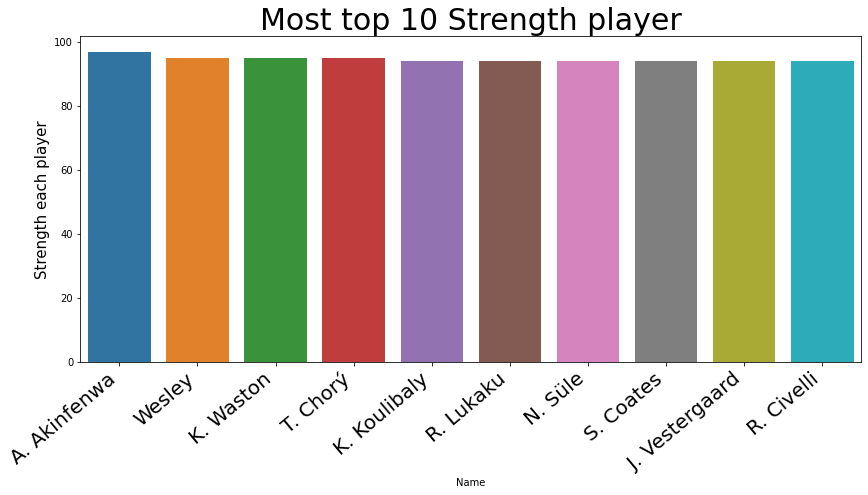

In [35]:
#เพื่อดูนักเตะที่มีความแข็งแกร่งมากที่สุด 10 คน

plt.figure(figsize=(14,6))
ax = sns.barplot(data=sec_fifa.nlargest(10,'Strength', keep='first'), x='Name', y='Strength')
ax.set_title('Most top 10 Strength player', fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=40, ha="right")
ax.set_ylabel('Strength each player', fontsize=15)

#Feature Engineering

In [36]:
# นำไปใช้ plot graph เพื่อเปรียบเทียบค่า หลัง StandardScaler เฉยๆ
fifa_plot = sec_fifa.copy()

In [37]:
Column_fifa = ['Age','Height_cm','Weight_kg','Agility','Stamina','Strength']

In [38]:
fifa_19 = sec_fifa.copy()

# StandardScaler จะปรับขนาดแต่ละคอลัมน์ให้มีค่าเฉลี่ยเป็น 0
standard_data = preprocessing.StandardScaler()
standard_data.fit(fifa_19[Column_fifa])
fifa_19 = standard_data.fit_transform(fifa_19[Column_fifa])

# ยัดเป็น dataframe ตัด ทศนิยม ให้เหลือ 2 ตำแหน่ง
fifa_19 = pd.DataFrame(fifa_19, columns=Column_fifa).round(2)
fifa_19.head()

,Age,Height_cm,Weight_kg,Agility,Stamina,Strength
0,1.26,-1.65,-0.45,1.86,0.55,-0.50
1,1.69,1.00,1.09,1.59,1.56,1.09
2,0.19,-0.89,-1.02,2.20,1.12,-1.30
3,0.40,1.75,0.13,-0.24,-1.27,-0.11
4,0.40,-0.14,-0.77,1.05,1.68,0.77


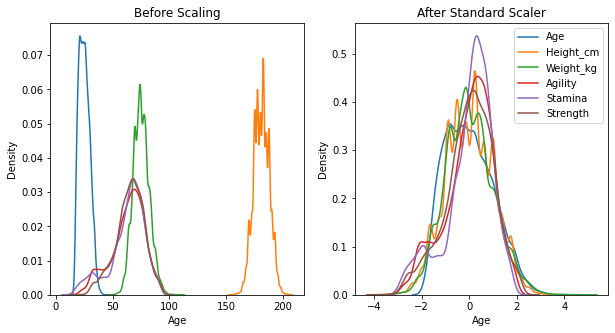

In [39]:
# plot graph ออกมาดู
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# ก่อนปรับ
ax1.set_title('Before Scaling')
sns.kdeplot(fifa_plot['Age'], ax=ax1, label='Age')
sns.kdeplot(fifa_plot['Height_cm'], ax=ax1, label='Height_cm')
sns.kdeplot(fifa_plot['Weight_kg'], ax=ax1, label='Weight_kg')
sns.kdeplot(fifa_plot['Agility'], ax=ax1, label='Agility')
sns.kdeplot(fifa_plot['Stamina'], ax=ax1, label='Stamina')
sns.kdeplot(fifa_plot['Strength'], ax=ax1, label='Strength')

# หลังปรับ
ax2.set_title('After Standard Scaler')
sns.kdeplot(fifa_19['Age'], ax=ax2, label='Age')
sns.kdeplot(fifa_19['Height_cm'], ax=ax2, label='Height_cm')
sns.kdeplot(fifa_19['Weight_kg'], ax=ax2, label='Weight_kg')
sns.kdeplot(fifa_19['Agility'], ax=ax2, label='Agility')
sns.kdeplot(fifa_19['Stamina'], ax=ax2, label='Stamina')
sns.kdeplot(fifa_19['Strength'], ax=ax2, label='Strength')
plt.legend()
plt.show()

In [40]:
# ตรวจสอบค่าต่ำสุดและสูงสุดสำหรับแต่ละคอลัมน์หลังจาก StandardScaler
mins = [fifa_19[col].min() for col in fifa_19.columns]
mins

[-1.95, -3.91, -3.59, -3.35, -3.22, -3.85]

In [41]:
# ตรวจสอบค่าต่ำสุดและสูงสุดสำหรับแต่ละคอลัมน์หลังจาก StandardScaler
maxs = [fifa_19[col].max() for col in fifa_19.columns]
maxs

[4.26, 3.64, 4.94, 2.2, 2.06, 2.52]

In [42]:
# เอาdata sec_fifa และคอลัมน์ weigth height ทำการก็อปปีค่า จาก ตัว data fifa_19 ของขอลัมน์ weigth height ที่ได้ทำการ สเกลค่าไว้แล้ว
# sec_fifa[Column_fifa] = fifa_19[Column_fifa].copy()
# sec_fifa.head(5)

In [43]:
# สร้างตัวแปร k_fifa ขึ้นมาใหม่ทำการ ก็อปปี้ data ของ sec_fifa ไว้ และทำการ ดรอป ฟีเจอร์ ที่ไม่ได้ใช้ออกไปก่อน
k_fifa = fifa_19.copy()
# k_fifa.drop(['BMI','Name', 'Position','Groups_Position'],axis=1, inplace=True)

#Modeling

In [44]:
k_fifa

,Age,Height_cm,Weight_kg,Agility,Stamina,Strength
0,1.26,-1.65,-0.45,1.86,0.55,-0.50
1,1.69,1.00,1.09,1.59,1.56,1.09
2,0.19,-0.89,-1.02,2.20,1.12,-1.30
3,0.40,1.75,0.13,-0.24,-1.27,-0.11
4,0.40,-0.14,-0.77,1.05,1.68,0.77
...,...,...,...,...,...,...
18142,-1.31,-0.89,-2.05,-0.24,-1.46,-1.46
18143,-1.31,1.37,0.26,-1.73,-1.27,0.13
18144,-1.95,-1.27,-1.15,-0.91,-0.52,-2.65
18145,-1.74,-0.51,-0.77,-0.78,-1.46,-1.38


##Benchmark

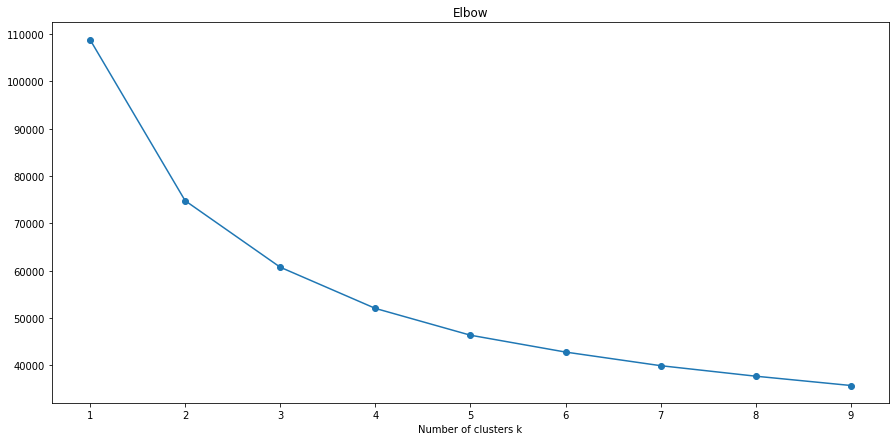

In [45]:
# ใช้ elbow เพื่อหาจำนวนคลัสเตอร์ที่เหมาะสมที่สุด
x = k_fifa.iloc[:,0:7]
sse = []
k_list = range(1, 10)
for k in k_list:
    kmeans = KMeans(n_clusters=k, init='k-means++',random_state=5)
    kmeans.fit(x)
    labels = kmeans.labels_
    k_fifa[f'k={k}']= labels
    sse.append(kmeans.inertia_)
plt.plot(range (1,10), sse, '-o')
plt.title("Elbow")
plt.xlabel("Number of clusters k") 
plt.show()

## Interpretation



###K 2



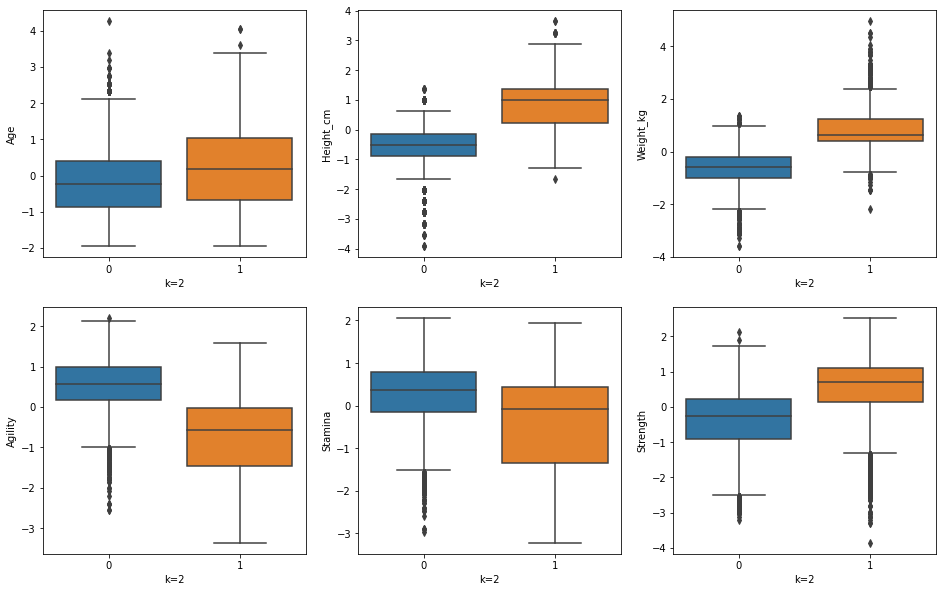

In [46]:
#boxplot

fig, ax = plt.subplots(nrows=2, ncols=3,figsize=( 16, 10))
ax = ax.ravel()
for n,columns in enumerate(Column_fifa):
  sns.boxplot(x='k=2', y=columns, data=k_fifa, ax=ax[n])

###K 3

In [47]:
k_fifa.head(5)

,Age,Height_cm,Weight_kg,Agility,Stamina,Strength,k=1,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9
0,1.26,-1.65,-0.45,1.86,0.55,-0.50,0,0,1,1,1,0,6,2,0
1,1.69,1.00,1.09,1.59,1.56,1.09,0,1,2,1,1,4,4,1,3
2,0.19,-0.89,-1.02,2.20,1.12,-1.30,0,0,1,2,4,0,6,2,7
3,0.40,1.75,0.13,-0.24,-1.27,-0.11,0,1,0,3,3,3,3,0,1
4,0.40,-0.14,-0.77,1.05,1.68,0.77,0,0,2,1,1,0,6,2,4


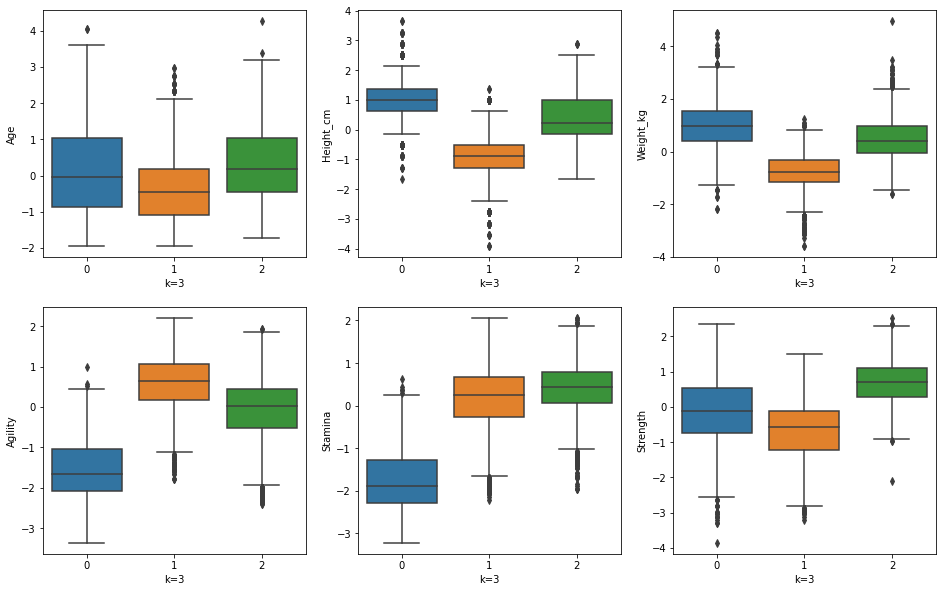

In [48]:
#boxplot

fig, ax = plt.subplots(nrows=2, ncols=3,figsize=( 16, 10))
ax = ax.ravel()
for n,columns in enumerate(Column_fifa):
  sns.boxplot(x='k=3', y=columns, data=k_fifa, ax=ax[n])

###K 4

In [49]:
sec_fifa[sec_fifa['Groups_Position'] == 'ATK'].head(20)

,Name,Age,Weight_kg,Height_cm,Position,Agility,Stamina,Strength,BMI,Groups_Position
0,L. Messi,31,72.12,170.18,RF,91.0,72.0,59.0,24.90,ATK
1,Cristiano Ronaldo,33,83.01,187.96,ST,87.0,88.0,79.0,23.50,ATK
2,Neymar Jr,26,68.04,175.26,LW,96.0,81.0,49.0,22.15,ATK
5,E. Hazard,27,73.94,172.72,LF,95.0,83.0,66.0,24.78,ATK
7,L. Suárez,31,86.18,182.88,RS,82.0,90.0,83.0,25.77,ATK
10,R. Lewandowski,29,79.83,182.88,ST,78.0,78.0,84.0,23.87,ATK
15,P. Dybala,24,74.84,177.80,LF,91.0,80.0,65.0,23.67,ATK
16,H. Kane,24,88.90,187.96,ST,71.0,89.0,84.0,25.16,ATK
21,E. Cavani,31,77.11,185.42,LS,77.0,92.0,78.0,22.43,ATK
23,S. Agüero,30,69.85,172.72,ST,86.0,76.0,73.0,23.42,ATK


In [50]:
k_fifa[k_fifa['k=4'] ==0].head(20)

,Age,Height_cm,Weight_kg,Agility,Stamina,Strength,k=1,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9
9,-0.03,1.00,1.67,0.24,-1.40,1.01,0,1,0,0,2,1,1,6,5
12,1.47,1.00,0.39,-0.37,0.17,1.81,0,1,2,0,2,1,1,6,3
16,-0.24,1.00,1.92,0.51,1.62,1.49,0,1,2,0,2,1,1,6,5
20,0.83,1.00,0.13,0.17,1.43,0.93,0,1,2,0,2,4,4,1,3
24,1.69,1.00,1.35,-0.64,0.11,1.89,0,1,2,0,2,1,1,6,5
27,0.19,0.62,1.22,-0.10,1.50,1.89,0,1,2,0,2,1,1,6,3
33,0.83,1.00,0.64,0.85,0.80,0.85,0,1,2,0,2,4,4,1,3
34,0.83,1.37,2.37,-0.03,0.17,1.49,0,1,2,0,2,1,1,6,5
36,0.62,0.62,0.96,1.25,0.74,1.17,0,1,2,0,2,4,4,1,3
38,1.04,0.62,1.92,0.78,0.43,1.57,0,1,2,0,2,1,1,6,3


In [51]:
k_fifa[k_fifa['k=4'] ==1].head(10)

,Age,Height_cm,Weight_kg,Agility,Stamina,Strength,k=1,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9
0,1.26,-1.65,-0.45,1.86,0.55,-0.50,0,0,1,1,1,0,6,2,0
1,1.69,1.00,1.09,1.59,1.56,1.09,0,1,2,1,1,4,4,1,3
4,0.40,-0.14,-0.77,1.05,1.68,0.77,0,0,2,1,1,0,6,2,4
5,0.40,-1.27,-0.19,2.13,1.24,0.05,0,0,1,1,1,0,6,2,4
6,1.47,-1.27,-1.28,2.00,1.62,-0.58,0,0,1,1,1,0,6,2,0
7,1.26,0.24,1.54,1.25,1.68,1.41,0,1,2,1,2,4,4,1,3
8,1.47,0.24,0.96,0.98,1.31,1.41,0,1,2,1,1,4,4,1,3
10,0.83,0.24,0.64,0.98,0.93,1.49,0,1,2,1,1,4,4,1,3
11,0.62,0.24,0.13,0.44,0.74,0.61,0,0,2,1,1,4,4,1,3
13,1.47,-1.27,-1.15,1.93,0.93,-1.06,0,0,1,1,1,0,6,2,0


In [52]:
k_fifa[k_fifa['k=4'] ==2].head(10)

,Age,Height_cm,Weight_kg,Agility,Stamina,Strength,k=1,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9
2,0.19,-0.89,-1.02,2.20,1.12,-1.30,0,0,1,2,4,0,6,2,7
29,0.40,-2.78,-2.31,2.07,0.74,-1.70,0,0,1,2,4,2,2,3,7
50,1.26,-1.65,-2.05,2.07,0.74,-1.86,0,0,1,2,4,0,6,3,7
56,-0.45,-1.27,-1.60,1.79,0.93,-1.38,0,0,1,2,4,2,2,3,7
60,-0.45,-1.65,-0.90,2.00,0.93,-1.06,0,0,1,2,4,0,6,3,7
63,-0.03,-2.40,-2.18,1.59,0.87,-1.06,0,0,1,2,4,0,2,3,7
151,1.04,-2.40,-1.02,1.93,0.74,-1.38,0,0,1,2,4,0,6,3,7
155,-0.88,-0.51,-1.15,1.79,0.62,-1.54,0,0,1,2,4,2,2,3,7
161,-0.45,-1.27,-1.60,1.73,1.18,-0.58,0,0,1,2,4,0,6,2,7
163,-0.67,-1.65,-1.86,1.59,0.99,-0.18,0,0,1,2,4,0,6,2,7


In [53]:
k_fifa[k_fifa['k=4'] ==3].head(10)

,Age,Height_cm,Weight_kg,Agility,Stamina,Strength,k=1,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9
3,0.40,1.75,0.13,-0.24,-1.27,-0.11,0,1,0,3,3,3,3,0,1
18,0.19,1.00,1.35,-1.79,-1.78,1.09,0,1,0,3,3,3,3,0,1
19,0.19,2.51,2.95,-0.17,-1.59,0.37,0,1,0,3,3,1,3,0,1
22,1.47,1.75,2.37,-0.85,-1.27,1.17,0,1,0,3,2,1,3,0,1
37,1.26,1.00,0.96,-0.58,-1.40,-1.78,0,1,0,3,3,3,3,0,1
40,1.69,1.75,2.37,-1.12,-1.40,0.45,0,1,0,3,3,3,3,0,1
41,3.19,1.75,2.37,-0.58,-1.52,0.29,0,1,0,3,3,3,3,0,1
46,1.26,0.62,0.64,-0.24,-1.52,0.77,0,1,0,3,2,3,3,0,1
57,-0.24,1.00,1.54,-0.24,-1.40,0.21,0,1,0,3,3,3,3,0,1
81,-0.03,1.37,2.25,-1.59,-1.96,1.01,0,1,0,3,3,3,3,0,1


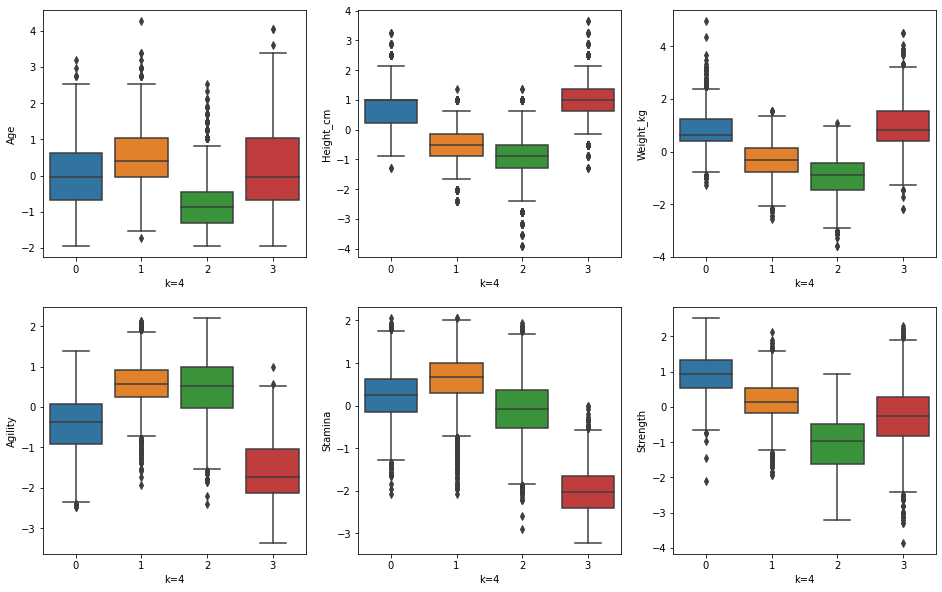

In [54]:
#boxplot

fig, ax = plt.subplots(nrows=2, ncols=3,figsize=( 16, 10))
ax = ax.ravel()
for n,columns in enumerate(Column_fifa):
  sns.boxplot(x='k=4', y=columns, data=k_fifa, ax=ax[n])
  ['ตัวสมดุล','ตัวเล็ก','ตัวสูง', 'ตัวแข็ง']

####Umap k=2

In [55]:
# UMAP 3D 

feature = k_fifa[Column_fifa]

umap_3d = UMAP(n_components=3, init='random', random_state=5)
tran_3d = umap_3d.fit_transform(feature)

fig_k2 = px.scatter_3d(tran_3d ,x=0 ,y=1 ,z=2 ,labels=k_fifa['k=2'] ,color=k_fifa['k=2'])
fig_k2.update_traces(marker_size=5)
fig_k2.show() 

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



####Umap k=3

In [56]:
# UMAP 3D 

feature = k_fifa[Column_fifa]
umap_3d = UMAP(n_components=3, init='random', random_state=5)
tran_3d = umap_3d.fit_transform(feature)
fig_k3 = px.scatter_3d(tran_3d ,x=0 ,y=1 ,z=2 ,labels=k_fifa['k=3'] ,color=k_fifa['k=3'])
fig_k3.update_traces(marker_size=5)
fig_k3.show() 

####Umap k=4

In [57]:
# UMAP 3D 

feature = k_fifa[Column_fifa]

umap_3d = UMAP(n_components=3, init='random', random_state=5)
tran_3d = umap_3d.fit_transform(feature)

fig_k4 = px.scatter_3d(tran_3d ,x=0 ,y=1 ,z=2 ,labels=k_fifa['k=4'] ,color=k_fifa['k=4'])
fig_k4.update_traces(marker_size=5)
fig_k4.show() 

##สรุป

สรุปจากกราฟ Elbow จะเห็นได้ว่าจากกราฟจะมีจุด k อยู่หลายกลุ่มแต่จะเห็นได้ว่าจุดที่ตัดและที่เรานำมาดูคือ k = 2, k = 3 และ k = 4  และนำค่า k ของ 3 ตัวนี้มาทำเป็น Box plot และทำการ Umap แบบ 3D เพื่อดูการกระจายตัวของแต่ละคัสเตอร์ ซึ่งสรุปได้ว่า k = 3 เป็นกลุ่มที่มีการแทรกแซงของคัสเตอร์น้อยที่สุดจึงได้ว่ากลุ่ม k=3 เป็นกลุ่มที่จัดออกมาได้ชัดเจนที่สุดจากที่เลือกค่า k มา แต่เราจะใช้ k = 4ในการจัดเลือกนักเตะกลุ่มเป้าหมายได้หลากหลาย ซึ่ง k = 4 ทำให้รู้ว่า นักเตะของเราสามารถจัดกลุ่มตามสมรรถนะออกมาที่ต่างกัน เราจะนำข้อมูลที่จัดกลุ่มไว้ นำไปใช้เพื่อจะได้เลือกนักเตะให้ตรงกับกลุ่มเป้าหมายของเราตามสมรรถนะที่ต้องการ ซึ่งสามารถแบ่งออกได้ 4 กลุ่ม

- กลุ่มสมรรถนะที่มีความแข่งแกร่งสูงที่สุดและความอึดปานกลางความว่องไวต่ำ ตัวสูง เหมาะกับเป็นตัวเชิงรับ(cluster 0) 

- กลุ่มสมรรถนะที่มีความว่องไว,ความอึดและความแข็งแกร่งสูงพอๆกัน  เหมาะกับเป็นตัวสมดุล(cluster 1) 

- กลุ่มสมรรถนะที่มีความว่องไวและความอึดสูงแต่ความแข็งแกร่งต่ำ เหมาะกับเป็นตัวรุกเชิงเทคนิค(cluster 2) 

- กลุ่มสมรรถนะที่มีความแข็งแกร่งสูงและความว่องไวและความอึดต่ำ ตัวสูง เหมาะกับเป็นกลุ่มผู้รักษาประตู(cluster 3) 

#Pipeline

In [58]:
class Pipeline_fifa():
    def __init__(self):
        self.scaler = preprocessing.StandardScaler()
        self.columnbefore = ['Name','Age','Height', 'Weight','Position','Agility','Stamina','Strength']
        self.columnData = ['Age','Weight','Height','Agility','Stamina','Strength']
#ดึงข้อ column ที่จะใช้และ drop column ที่มี null
    def data_cleaning(self,data,method):
        if method == 'train':
          data = data[self.columnbefore]
          data = data.dropna()
          data = data[self.columnData]
          data.reset_index(drop=True,inplace=True)
        return data
#เปลี่ยนข้อมูลของ Height ให้เป็น cm เปลี่ยนข้อมูลของ Weight ให้เป็น kg
    def convert_data(self,data,method):
        if method == 'train':
          data['Height'] = data['Height'].apply(lambda i: int(i.split("'")[0])*12*2.54 + 2.54*int(i.split("'")[1]))
          data['Weight'] = data['Weight'].str.replace(r'\D', '')
          data['Weight'] = data['Weight'].astype(int)
          lbs_to_kg = 0.45359237 
          data['Weight'] = data['Weight'] * lbs_to_kg
          data['Weight'] = data['Weight'].round(2)
        return data
#scale ข้อมูอเข้า model
    def feature_engineering(self,data,method):
        if method == 'train':
            data = self.scaler.fit_transform(data)
            data = pd.DataFrame(data, columns=self.columnData).round(2)
        elif method == 'predict':
            data = self.scaler.transform(data)
            data = pd.DataFrame(data, columns=self.columnData).round(2)
        return data
# execute
    def execute(self,data,method):
        data = self.data_cleaning(data,method)
        data = self.convert_data(data,method)
        data = self.feature_engineering(data,method)
        return data

In [59]:
pipe_fifa = pd.read_csv('https://raw.githubusercontent.com/boatmessi02/Fifa19/main/data.csv')


In [60]:
pipe = Pipeline_fifa()
fifa_data = pipe.execute(data = pipe_fifa,method='train')

In [61]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=5)
kmeans.fit(fifa_data)
labels = kmeans.labels_

#นำข้อมูล k ไปกระจายใน DataFrame ใหม่เพื่อเป็นการ return นักเตะที่มีสมรรถนะใกล้เคียงไปอยู่ในแต่ละคลัสเตอร์
NamePlayer['k=4'] = labels

In [62]:
NamePlayer

,Name,Age,Weight_kg,Height_cm,Position,Agility,Stamina,Strength,BMI,Groups_Position,k=4
0,L. Messi,31,72.12,170.18,RF,91.0,72.0,59.0,24.90,ATK,1
1,Cristiano Ronaldo,33,83.01,187.96,ST,87.0,88.0,79.0,23.50,ATK,1
2,Neymar Jr,26,68.04,175.26,LW,96.0,81.0,49.0,22.15,ATK,2
3,De Gea,27,76.20,193.04,GK,60.0,43.0,64.0,20.45,GK,3
4,K. De Bruyne,27,69.85,180.34,RCM,79.0,90.0,75.0,21.48,MID,1
...,...,...,...,...,...,...,...,...,...,...,...
18142,J. Lundstram,19,60.78,175.26,CM,60.0,40.0,47.0,19.79,MID,2
18143,N. Christoffersson,19,77.11,190.50,ST,38.0,43.0,67.0,21.25,ATK,3
18144,B. Worman,16,67.13,172.72,ST,50.0,55.0,32.0,22.50,ATK,2
18145,D. Walker-Rice,17,69.85,177.80,RW,52.0,40.0,48.0,22.10,ATK,2


#Deployment

In [63]:
pip install gradio -q

     |████████████████████████████████| 979 kB 4.3 MB/s 
     |████████████████████████████████| 206 kB 46.7 MB/s 
     |████████████████████████████████| 2.0 MB 27.5 MB/s 
     |████████████████████████████████| 3.6 MB 37.4 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 961 kB 43.1 MB/s 


In [64]:
import gradio as gr

In [65]:
#ผลลัพธ์ 10 นักเตะที่อยู่ในคลัสเตอร์เดียวกับ ข้อมูลที่ถูก input มา
def getPlayer(index):
    findoutPlayer = NamePlayer.loc[NamePlayer['k=4'] == index]
    findoutPlayer.drop('k=4', axis=1 ,inplace=True)
    return findoutPlayer

In [66]:
#นำข้อมูล input ไป scale เพื่อนำมา predict ข้อมูลที่ input อยู่ในคลัสเตอร์ไหน
def managerPlayer(Age,Weight,Height,Agility,Stamina,Strength):
    input = pd.DataFrame({
        'Age':Age,'Weight':Weight,'Height':Height,'Agility':Agility,'Stamina':Stamina,'Strength':Strength
    }, index=[0])

    predict_fifa = pipe.execute(input,method='predict')
    index_group = kmeans.predict(predict_fifa)[0]
    returnPlayer = getPlayer(index_group)
    groups = ['นักเตะที่มีความแข็งแกร่ง','นักเตะสมดุล','นักเตะตัวรุกเชิงเทคนิค', 'ผู้รักษาประตู']
    return  groups[kmeans.predict(predict_fifa)[0]],returnPlayer.head(10)

In [67]:
#26,68,175,96,81,49
#0	L. Messi	31,	72,	170.18,	91,	72,	59
#18 M. ter Stegen    26,85, 188 ,37,35,79
#24 G. Chiellini 33,85,188,54,65,89
#T. Courtois 26,96,198,61,38,70
#J. Oblak 25,87,188,67,41,78
#H. Kane 24,89,188,71,89,84
#1.26	-0.45	-1.65	1.86	0.55	-0.50
#0.19	-0.89	-1.02	2.20	1.12	-1.30
# test = managerPlayer(31,	72,	170.18,	91,	72,	59)

In [68]:
Age = gr.inputs.Textbox(lines=1, placeholder='Enter Age', default="26", label='Age')
Weight = gr.inputs.Textbox(lines=1, placeholder='Enter Weight', default="68", label='Weight')
Height = gr.inputs.Textbox(lines=1, placeholder='Enter Height', default="175", label='Height')
Agility = gr.inputs.Textbox(lines=1, placeholder='Enter Agility', default="96", label='Agility')
Stamina = gr.inputs.Textbox(lines=1, placeholder='Enter Stamina', default="81", label='Stamina')
Strength = gr.inputs.Textbox(lines=1, placeholder='Enter Strength', default="49", label='Strength')

In [ ]:
iface = gr.Interface(
    managerPlayer,
    outputs=[gr.outputs.Textbox(type="auto", label='Cluster'),gr.outputs.Dataframe(label="Player")],
    inputs=[Age,
            Weight,
            Height,
            Agility,
            Stamina,
            Strength,
            ])
            
iface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://10368.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#Reference


*   https://www.kaggle.com/chaitanyahivlekar/fifa-19-scouting-and-eda#Clustering
*   https://bigdata.go.th/big-data-101/k-means-algorithm-for-clustering-large-data-sets-with-categorical-values/

*   https://jovian.ai/patelvj13/k-means-clustering-with-scaling
*   https://plotly.com/python/t-sne-and-umap-projections/


*   https://www.kaggle.com/discdiver/guide-to-scaling-and-standardizing#StandardScaler

*   https://github.com/flukezaza447/cs434_wine_project
*   https://github.com/gradio-app/gradio








#Members

*   นายธีรภัทร์ จันทร์ชื่น 1620706604
*   นายชยุตพงศ์ จำเนียรพงษ์พันธ์ 1620706646
*   นายวณิชนันท์ มะหะมาน 1620706638



